https://datahack.analyticsvidhya.com/contest/india-ml-hiring-hackathon-2019/

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling
import scipy.stats as stats
import matplotlib.pyplot as plt

In [465]:
# data = pd.read_csv('F:\\Analytix\\Git\\Analytix\\Hackathon\\train_u5jK80M\\train.csv')
data = pd.read_csv('C:\\Analytix\\Git\\Analytix\\Hackathon\\train_u5jK80M\\train.csv')
data.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [466]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 29 columns):
loan_id                     116058 non-null int64
source                      116058 non-null object
financial_institution       116058 non-null object
interest_rate               116058 non-null float64
unpaid_principal_bal        116058 non-null int64
loan_term                   116058 non-null int64
origination_date            116058 non-null object
first_payment_date          116058 non-null object
loan_to_value               116058 non-null int64
number_of_borrowers         116058 non-null float64
debt_to_income_ratio        116058 non-null float64
borrower_credit_score       116058 non-null float64
loan_purpose                116058 non-null object
insurance_percent           116058 non-null float64
co-borrower_credit_score    116058 non-null float64
insurance_type              116058 non-null float64
m1                          116058 non-null int64
m2                  

In [467]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_id,116058.0,5.494155e+11,2.597560e+11,1.000009e+11,3.244656e+11,5.486239e+11,7.743034e+11,9.999971e+11
interest_rate,116058.0,3.868961e+00,4.610200e-01,2.250000e+00,3.500000e+00,3.875000e+00,4.125000e+00,6.750000e+00
unpaid_principal_bal,116058.0,2.082262e+05,1.146851e+05,1.100000e+04,1.200000e+05,1.830000e+05,2.780000e+05,1.200000e+06
loan_term,116058.0,2.922810e+02,8.976241e+01,6.000000e+01,1.800000e+02,3.600000e+02,3.600000e+02,3.600000e+02
loan_to_value,116058.0,6.743194e+01,1.729172e+01,6.000000e+00,5.700000e+01,7.200000e+01,8.000000e+01,9.700000e+01
number_of_borrowers,116058.0,1.593186e+00,4.912417e-01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
debt_to_income_ratio,116058.0,3.074229e+01,9.730798e+00,1.000000e+00,2.300000e+01,3.100000e+01,3.900000e+01,6.400000e+01
borrower_credit_score,116058.0,7.699268e+02,4.221071e+01,0.000000e+00,7.510000e+02,7.820000e+02,8.000000e+02,8.400000e+02
insurance_percent,116058.0,2.786288e+00,8.096464e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+01
co-borrower_credit_score,116058.0,4.596116e+02,3.819469e+02,0.000000e+00,0.000000e+00,7.400000e+02,7.910000e+02,8.360000e+02


In [468]:
# profile = pandas_profiling.ProfileReport(data)

In [469]:
# profile.to_file(outputfile='profiling.html')

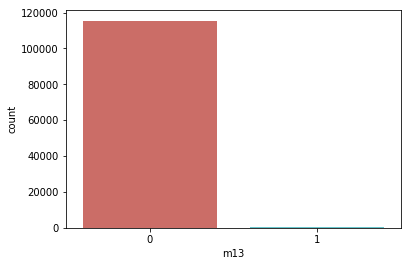

In [470]:
sns.countplot(x='m13',data=data,palette='hls')
plt.show()

In [471]:
defaulter = data[data['m13'] == 1]
non_defaulter = data[data['m13'] == 0]
print(len(defaulter))
print(len(non_defaulter))

636
115422


In [472]:
default_indices = np.array(data[data['m13'] == 1].index)
non_default_indices = np.array(data[data['m13'] == 0].index)

https://www.kaggle.com/gargmanish/how-to-handle-imbalance-data-study-in-detail

In [474]:
data.groupby('m13').mean()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,...,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
m13,,,,,,,,,,,,,,,,,,,,,
0,5.494730e+11,3.867103,208371.965483,292.124404,67.410944,1.594644,30.714820,770.221985,2.782849,460.820823,...,0.001326,0.001170,0.001941,0.001551,0.001845,0.001975,0.001845,0.002565,0.002149,0.001897
1,5.389809e+11,4.206182,181776.729560,320.699686,71.242138,1.328616,35.727987,716.352201,3.410377,240.154088,...,0.119497,0.185535,0.292453,0.342767,0.424528,0.522013,0.643082,0.742138,0.907233,1.127358


In [475]:
num_vars = [col for col in dict(data.dtypes) if dict(data.dtypes)[col] in ['float64','int64']]
cat_vars = [col for col in dict(data.dtypes) if dict(data.dtypes)[col] in ['object']]
print(num_vars)
print(cat_vars)

['loan_id', 'interest_rate', 'unpaid_principal_bal', 'loan_term', 'loan_to_value', 'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score', 'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13']
['source', 'financial_institution', 'origination_date', 'first_payment_date', 'loan_purpose']


In [476]:
cat_vars = ['source',
            'financial_institution',
            'origination_date',
            'first_payment_date',
            'loan_purpose',
            'insurance_type',
            'number_of_borrowers']
num_vars = ['loan_id',
            'interest_rate',
            'unpaid_principal_bal',
            'loan_term',
            'loan_to_value',
            'debt_to_income_ratio',
            'borrower_credit_score',
            'insurance_percent',
            'co-borrower_credit_score']
ordinal_vars = ['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13']

In [477]:
data_num = data[num_vars]
data_num.head()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score
0,268055008619,4.250,214000,360,95,22.0,694.0,30.0,0.0
1,672831657627,4.875,144000,360,72,44.0,697.0,0.0,0.0
2,742515242108,3.250,366000,180,49,33.0,780.0,0.0,0.0
3,601385667462,4.750,135000,360,46,44.0,633.0,0.0,638.0
4,273870029961,4.750,124000,360,80,43.0,681.0,0.0,0.0


In [478]:
data_cat = data[cat_vars]
data_cat.head()

,source,financial_institution,origination_date,first_payment_date,loan_purpose,insurance_type,number_of_borrowers
0,Z,"Turner, Baldwin and Rhodes",2012-03-01,05/2012,C86,0.0,1.0
1,Y,"Swanson, Newton and Miller",2012-01-01,03/2012,B12,0.0,1.0
2,Z,Thornton-Davis,2012-01-01,03/2012,B12,0.0,1.0
3,X,OTHER,2012-02-01,04/2012,B12,0.0,2.0
4,X,OTHER,2012-02-01,04/2012,C86,0.0,1.0


In [479]:
data_ord = data[ordinal_vars]
data_ord.head()

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1,1,1,1,1
4,0,1,2,3,4,5,6,7,8,9,10,11,1


In [480]:
data_cat.drop(columns=['origination_date','first_payment_date'],inplace=True)
data_cat.head()

C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,source,financial_institution,loan_purpose,insurance_type,number_of_borrowers
0,Z,"Turner, Baldwin and Rhodes",C86,0.0,1.0
1,Y,"Swanson, Newton and Miller",B12,0.0,1.0
2,Z,Thornton-Davis,B12,0.0,1.0
3,X,OTHER,B12,0.0,2.0
4,X,OTHER,C86,0.0,1.0


In [481]:
def outlierCapping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x
data_num = data_num.apply(lambda x: outlierCapping(x))

In [482]:
data_num.corr()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score
loan_id,1.000000,-0.000843,0.005690,-0.001180,0.000670,0.003926,0.000400,0.000973,0.001917
interest_rate,-0.000843,1.000000,0.000071,0.728452,0.275547,0.183511,-0.223086,0.146604,-0.138254
unpaid_principal_bal,0.005690,0.000071,1.000000,0.192964,0.063857,0.073973,0.054287,0.012471,0.133517
loan_term,-0.001180,0.728452,0.192964,1.000000,0.292569,0.138152,-0.076748,0.191166,-0.110245
loan_to_value,0.000670,0.275547,0.063857,0.292569,1.000000,0.126334,-0.152916,0.491360,-0.109829
debt_to_income_ratio,0.003926,0.183511,0.073973,0.138152,0.126334,1.000000,-0.205020,0.066894,-0.145745
borrower_credit_score,0.000400,-0.223086,0.054287,-0.076748,-0.152916,-0.205020,1.000000,-0.069537,0.161513
insurance_percent,0.000973,0.146604,0.012471,0.191166,0.491360,0.066894,-0.069537,1.000000,-0.063485
co-borrower_credit_score,0.001917,-0.138254,0.133517,-0.110245,-0.109829,-0.145745,0.161513,-0.063485,1.000000


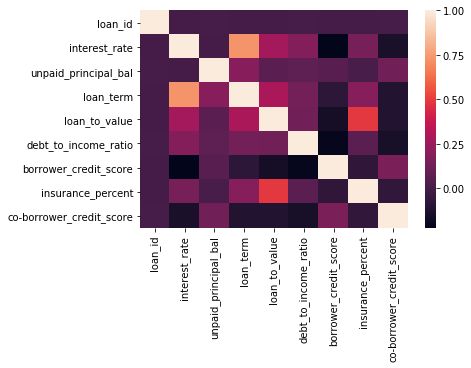

In [483]:
corr = data_num.corr()
sns.heatmap(corr)

In [484]:
data_cat = data_cat.apply(lambda x: x.astype('category'))
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 5 columns):
source                   116058 non-null category
financial_institution    116058 non-null category
loan_purpose             116058 non-null category
insurance_type           116058 non-null category
number_of_borrowers      116058 non-null category
dtypes: category(5)
memory usage: 567.9 KB


In [485]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [486]:
def create_dummies(df,colname):
    col_dummies = pd.get_dummies(df[colname],prefix=colname,drop_first=True)
    df = pd.concat([df,col_dummies],axis=1)
    df.drop(colname,axis=1,inplace=True)
    return df

In [487]:
data_cat_new = data_cat
for col in data_cat.columns:
    data_cat_new = create_dummies(data_cat_new,col)
data_cat_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 24 columns):
source_Y                                             116058 non-null uint8
source_Z                                             116058 non-null uint8
financial_institution_Browning-Hart                  116058 non-null uint8
financial_institution_Chapman-Mcmahon                116058 non-null uint8
financial_institution_Cole, Brooks and Vincent       116058 non-null uint8
financial_institution_Edwards-Hoffman                116058 non-null uint8
financial_institution_Martinez, Duffy and Bird       116058 non-null uint8
financial_institution_Miller, Mcclure and Allen      116058 non-null uint8
financial_institution_Nicholson Group                116058 non-null uint8
financial_institution_OTHER                          116058 non-null uint8
financial_institution_Richards-Walters               116058 non-null uint8
financial_institution_Richardson Ltd                 116058 non-

In [488]:
data_new = pd.concat([data_num,data_cat_new,data_ord],axis=1)
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 46 columns):
loan_id                                              116058 non-null float64
interest_rate                                        116058 non-null float64
unpaid_principal_bal                                 116058 non-null float64
loan_term                                            116058 non-null float64
loan_to_value                                        116058 non-null float64
debt_to_income_ratio                                 116058 non-null float64
borrower_credit_score                                116058 non-null float64
insurance_percent                                    116058 non-null float64
co-borrower_credit_score                             116058 non-null float64
source_Y                                             116058 non-null uint8
source_Z                                             116058 non-null uint8
financial_institution_Browning-Hart           

In [489]:
# data_new.rename(columns={'co-borrower_credit_score': 'co_borrower_credit_score'},inplace=True)
data_new.columns = [var.strip().replace('-','_') for var in data_new.columns]
data_new.columns = [var.strip().replace(' ','_') for var in data_new.columns]
data_new.columns = [var.strip().replace(',','_') for var in data_new.columns]
data_new.columns = [var.strip().replace('.','_') for var in data_new.columns]

In [490]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 46 columns):
loan_id                                              116058 non-null float64
interest_rate                                        116058 non-null float64
unpaid_principal_bal                                 116058 non-null float64
loan_term                                            116058 non-null float64
loan_to_value                                        116058 non-null float64
debt_to_income_ratio                                 116058 non-null float64
borrower_credit_score                                116058 non-null float64
insurance_percent                                    116058 non-null float64
co_borrower_credit_score                             116058 non-null float64
source_Y                                             116058 non-null uint8
source_Z                                             116058 non-null uint8
financial_institution_Browning_Hart           

In [491]:
data_new.describe()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,debt_to_income_ratio,borrower_credit_score,insurance_percent,co_borrower_credit_score,source_Y,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,1.160580e+05,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,...,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,5.494105e+11,3.867114,207808.345827,292.336883,67.461950,30.761309,770.305856,2.770098,459.586767,0.323580,...,0.002180,0.003533,0.003421,0.004162,0.004825,0.005359,0.006617,0.007109,0.008065,0.005480
std,2.596040e+11,0.452785,112880.558895,89.646335,17.154091,9.663045,38.641997,8.036764,381.923425,0.467844,...,0.062161,0.082638,0.087553,0.100961,0.113128,0.128242,0.148430,0.162884,0.178128,0.073824
min,1.082963e+11,2.875000,43000.000000,120.000000,21.000000,10.000000,650.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.244656e+11,3.500000,120000.000000,180.000000,57.000000,23.000000,751.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.486239e+11,3.875000,183000.000000,360.000000,72.000000,31.000000,782.000000,0.000000,740.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.743034e+11,4.125000,278000.000000,360.000000,80.000000,39.000000,800.000000,0.000000,791.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.908142e+11,5.000000,554000.000000,360.000000,95.000000,49.000000,820.000000,30.000000,819.000000,1.000000,...,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,1.000000


In [492]:
# profile_new = pandas_profiling.ProfileReport(data_new)
# profile_new.to_file(outputfile='profile_new.html')

In [493]:
data_new.drop(columns=['borrower_credit_score'],inplace=True)
#High correlation with 

In [494]:
data_new.head()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,debt_to_income_ratio,insurance_percent,co_borrower_credit_score,source_Y,source_Z,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,2.680550e+11,4.250,214000.0,360.0,95.0,22.0,30.0,0.0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,6.728317e+11,4.875,144000.0,360.0,72.0,44.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,1,0,1
2,7.425152e+11,3.250,366000.0,180.0,49.0,33.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,6.013857e+11,4.750,135000.0,360.0,46.0,44.0,0.0,638.0,0,0,...,0,0,0,0,0,1,1,1,1,1
4,2.738700e+11,4.750,124000.0,360.0,80.0,43.0,0.0,0.0,0,0,...,3,4,5,6,7,8,9,10,11,1


In [495]:
data_new.drop(columns=['loan_id'],inplace=True)

C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: divide by zero encountered in log
C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


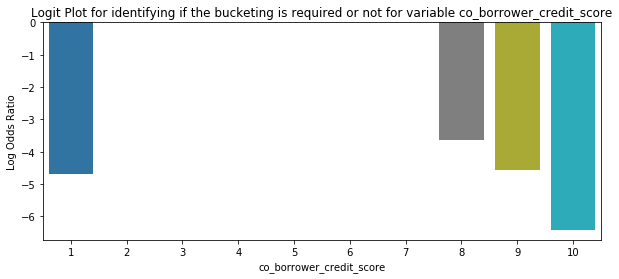

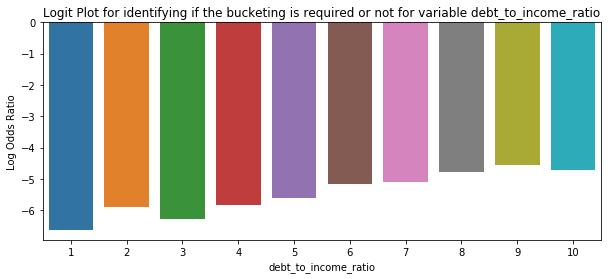

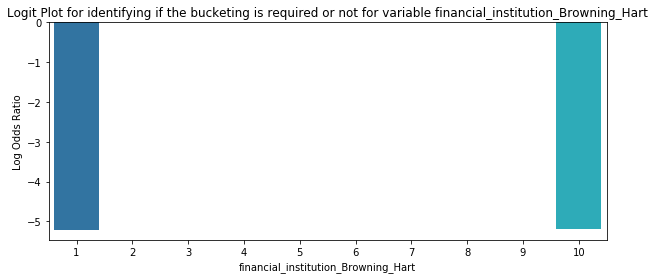

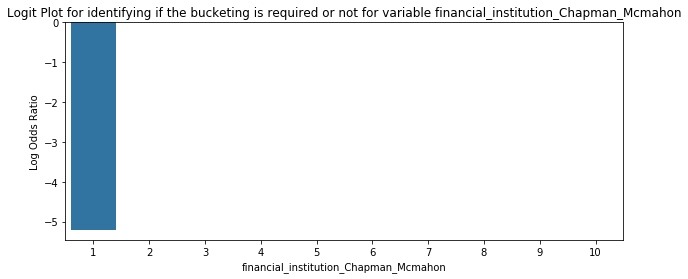

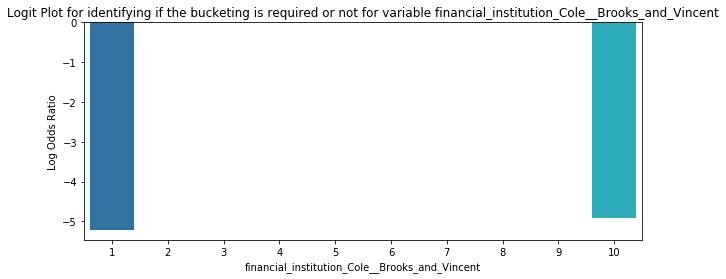

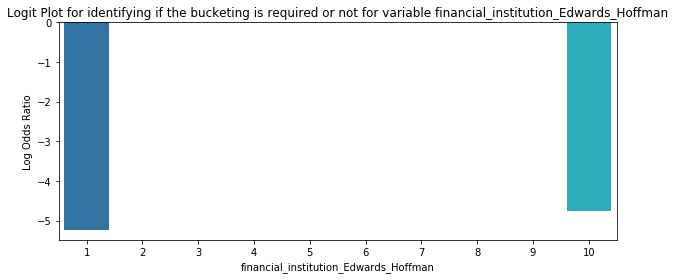

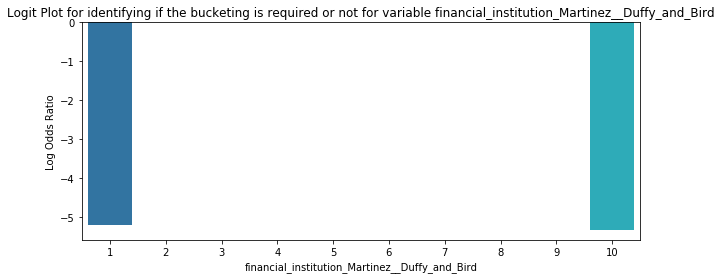

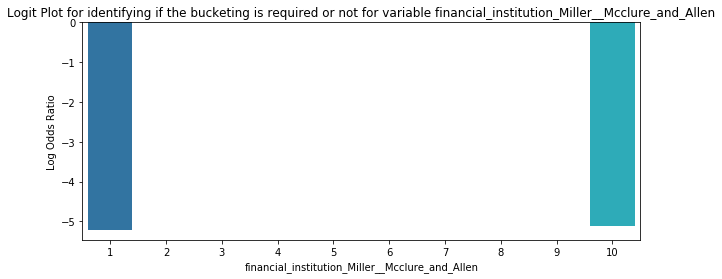

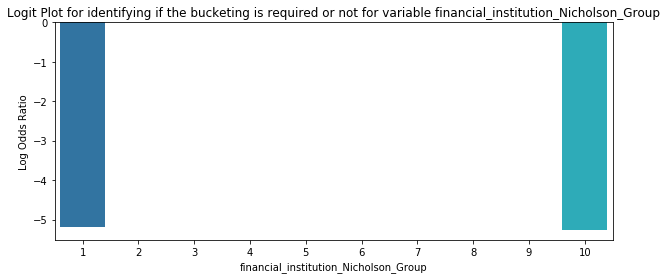

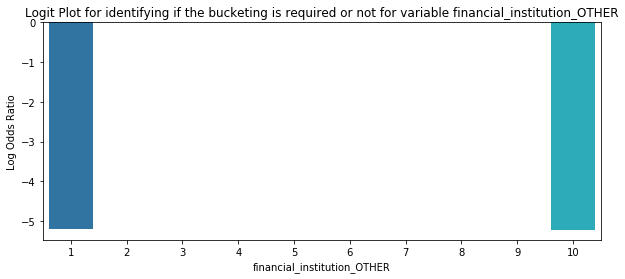

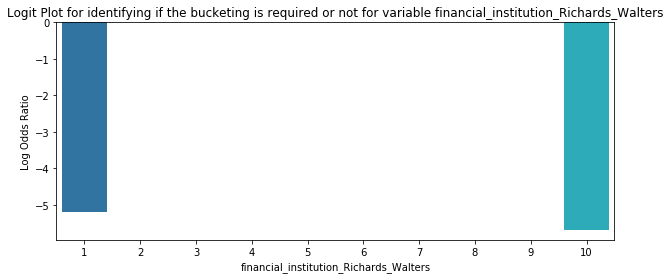

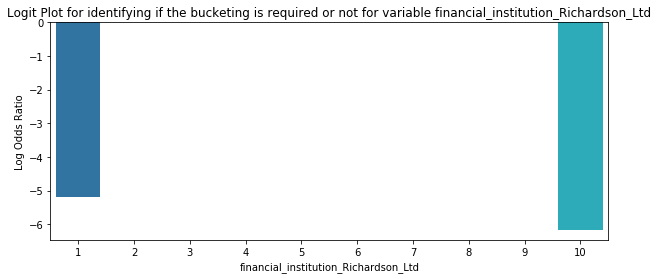

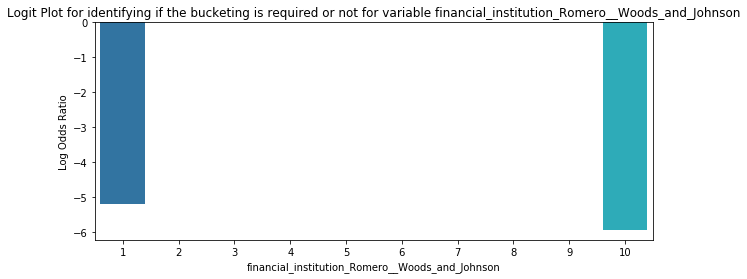

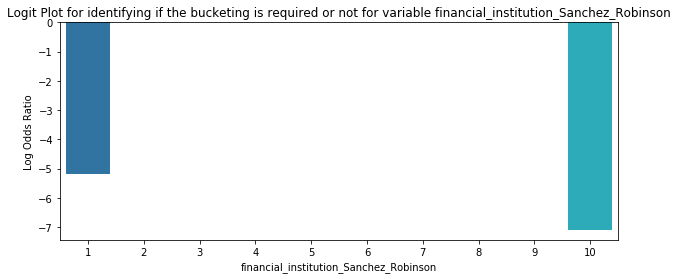

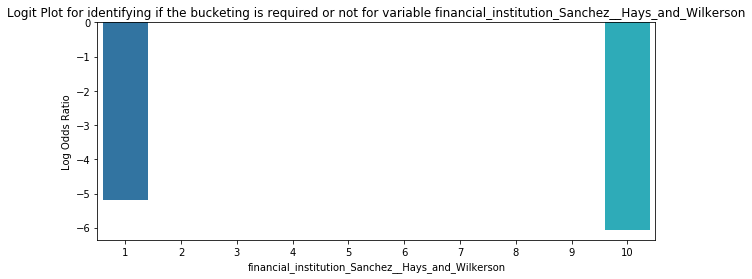

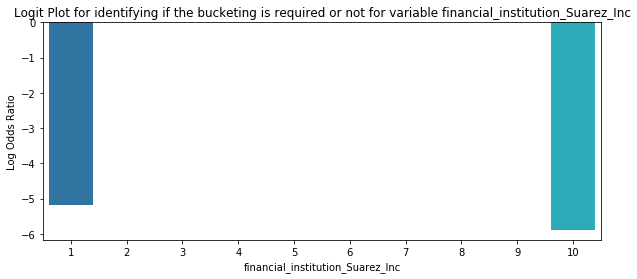

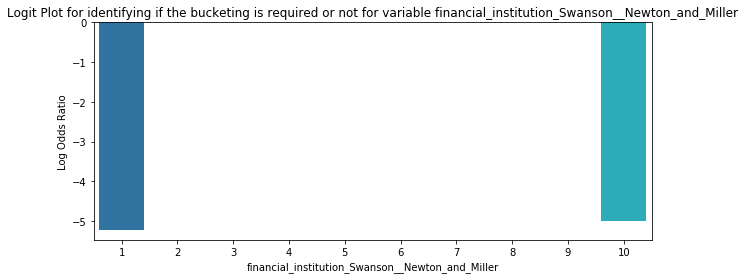

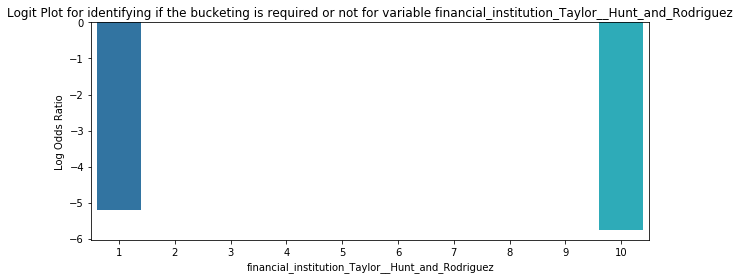

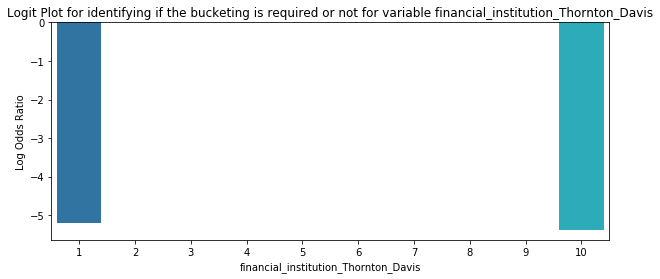

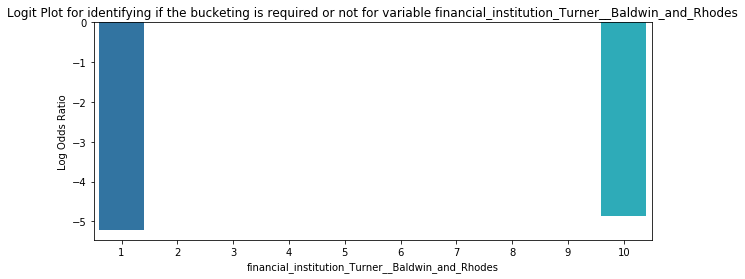

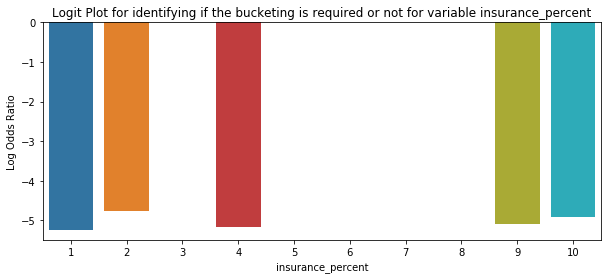

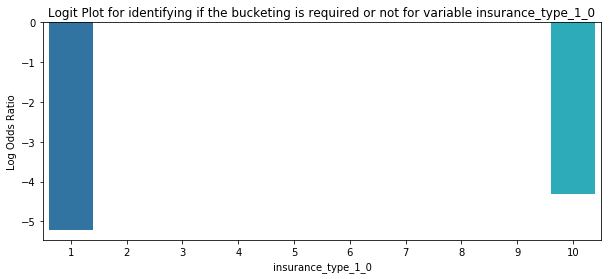

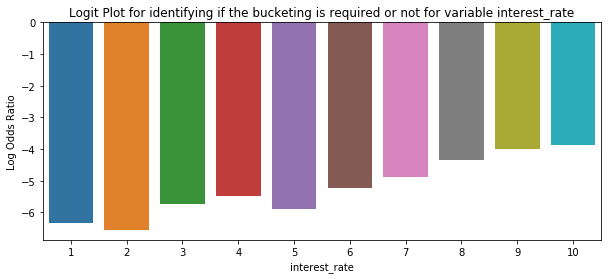

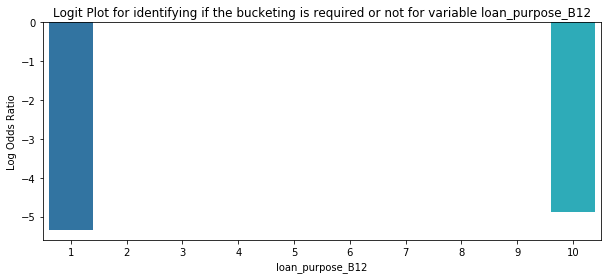

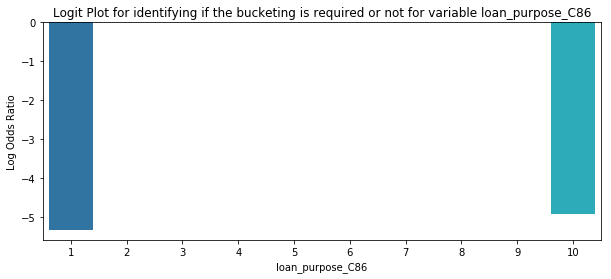

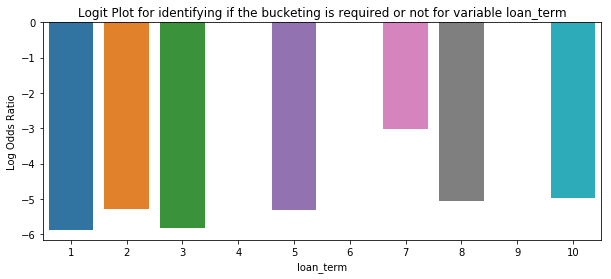

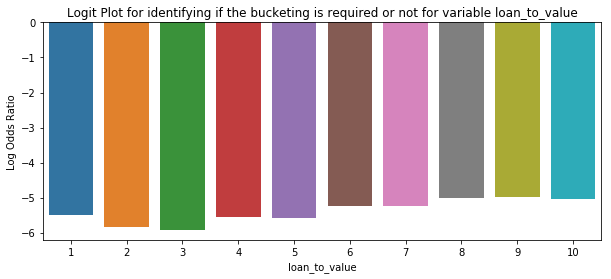

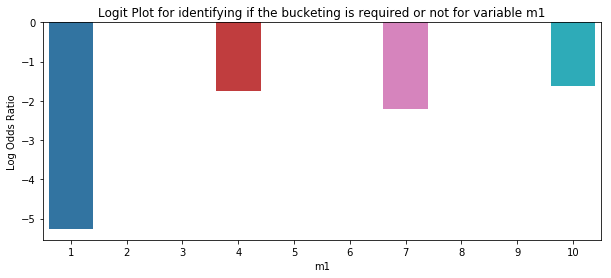

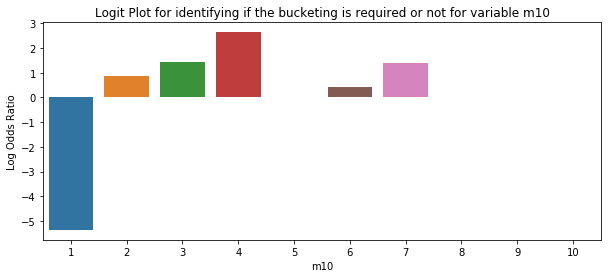

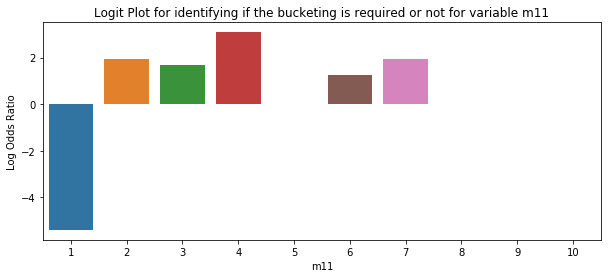

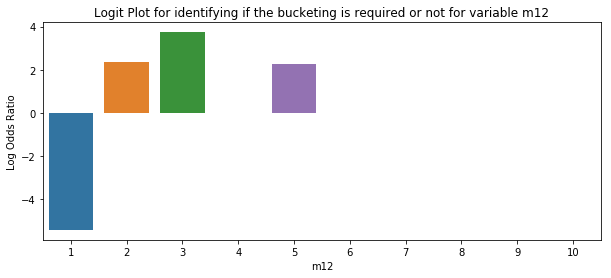

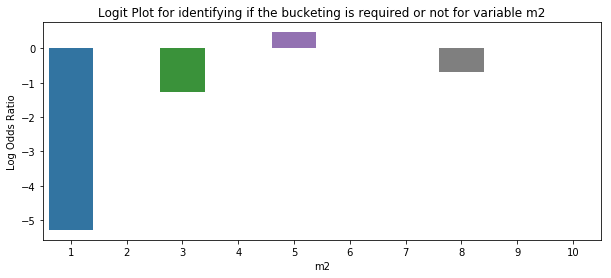

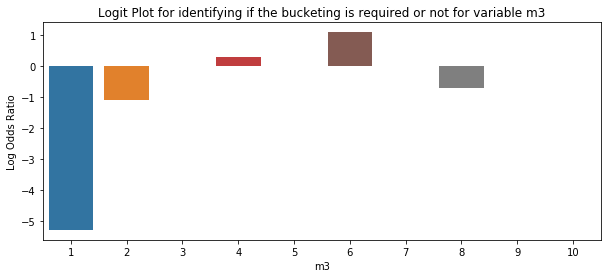

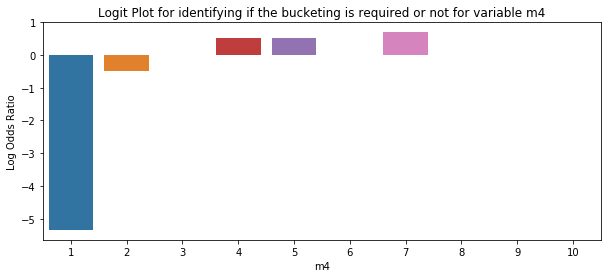

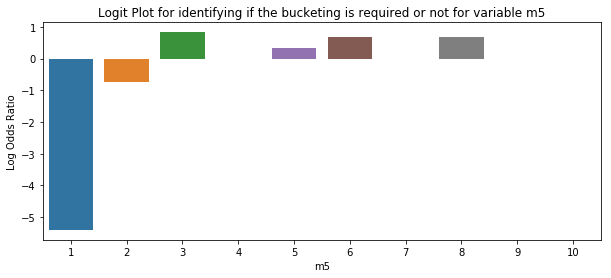

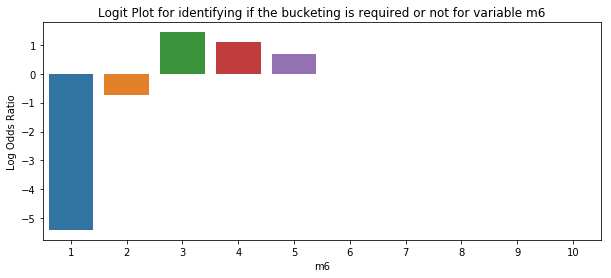

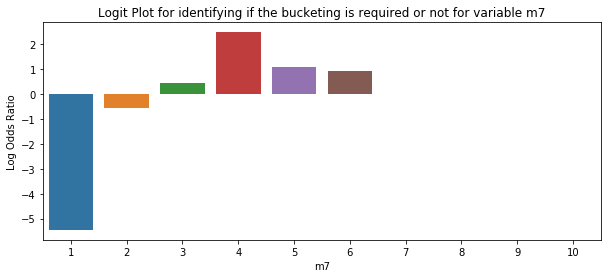

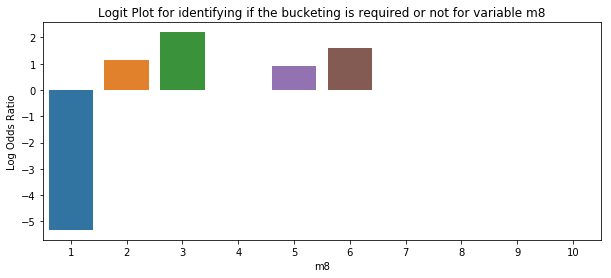

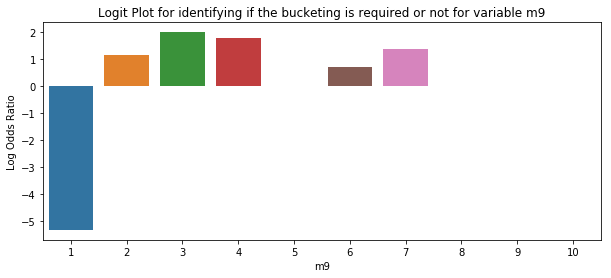

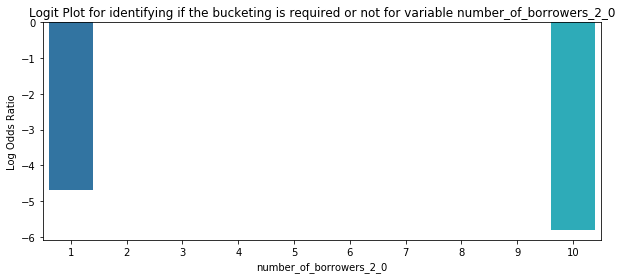

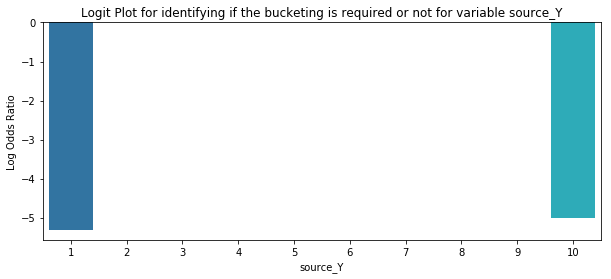

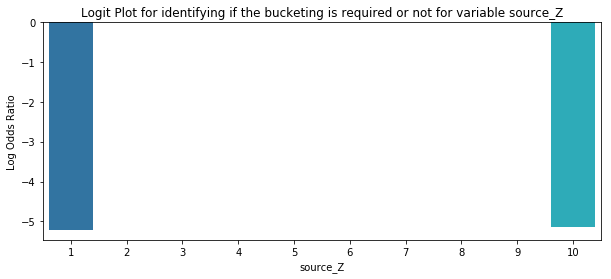

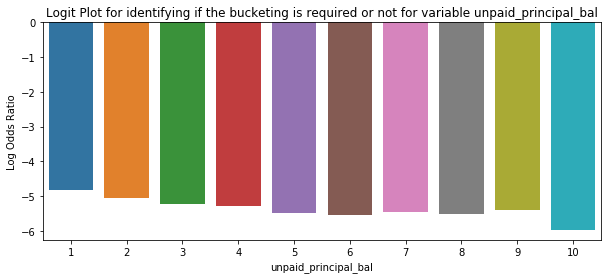

In [54]:
for feature in data_new.columns.difference(['m13']):
    binned = pd.cut(data_new[feature],bins=10, labels=list(range(1,11)))
    odds = data_new.groupby(binned)['m13'].sum() / (data_new.groupby(binned)['m13'].count()-data_new.groupby(binned)['m13'].sum())
    log_odds = np.log(odds)
    fig,axes = plt.subplots(figsize=(10,4))
    sns.barplot(x=log_odds.index,y=log_odds)
    plt.ylabel('Log Odds Ratio')
    plt.title(str('Logit Plot for identifying if the bucketing is required or not for variable ') + str(feature))

Variables with less variation in log odds:
    

In [496]:
import statsmodels.formula.api as sm
from sklearn import metrics

In [497]:
somersd_df = pd.DataFrame()
for feature in data_new.columns.difference(['m13']):
    logreg = sm.logit(formula='m13~' + str(feature),data=data_new)
    result = logreg.fit()
    y_score = pd.DataFrame(result.predict(),columns=['Score'])
    somersD = 2 * metrics.roc_auc_score(y_score=y_score,y_true=data_new['m13']) - 1
    temp = pd.DataFrame([feature,somersD]).T
    temp.columns = ['Variable Name', 'SomersD']
    somersd_df = pd.concat([somersd_df, temp], axis=0)

Optimization terminated successfully.
         Current function value: 0.033101
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.033233
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.033997
         Iterations 9
         Current function value: 0.033979
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.033994
         Iterations 9


C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.033967
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.033996
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.033997
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.033997
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.033997
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.033992
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.033992
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.033992
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.033966
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.03398

In [498]:
somersd_df = somersd_df.sort_values(by=['SomersD'],ascending=False).reset_index(drop=True)
selectsomers_df = somersd_df[somersd_df['SomersD'] > 0.02]
selected_from_somersD = np.array(selectsomers_df['Variable Name'])
selected_from_somersD

array(['m12', 'interest_rate', 'm11', 'co_borrower_credit_score', 'm10',
       'debt_to_income_ratio', 'm9', 'number_of_borrowers_2_0', 'm8',
       'm7', 'm5', 'm6', 'loan_term', 'unpaid_principal_bal',
       'loan_to_value', 'm4', 'loan_purpose_B12', 'm3', 'm2',
       'loan_purpose_C86', 'm1', 'source_Y', 'insurance_percent',
       'financial_institution_Edwards_Hoffman'], dtype=object)

RFE

In [499]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [500]:
X = data_new.iloc[:,:43]
y = data_new.iloc[:,43:]
logreg = LogisticRegression()
rfe = RFE(logreg,n_features_to_select=15)
rfe.fit(X,y)
print(rfe.support_)

C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ True False False False False False False False False False False False
  True False False False False False False  True False False False False
  True  True False False False  True  True  True False  True  True False
 False  True  True  True False  True  True]


In [501]:
selected_features_from_rfe = data_new.iloc[:,rfe.support_].columns
selected_features_from_rfe

Index(['interest_rate', 'financial_institution_Edwards_Hoffman',
       'financial_institution_Romero__Woods_and_Johnson',
       'financial_institution_Taylor__Hunt_and_Rodriguez',
       'financial_institution_Thornton_Davis', 'insurance_type_1_0',
       'number_of_borrowers_2_0', 'm1', 'm3', 'm4', 'm7', 'm8', 'm9', 'm11',
       'm12'],
      dtype='object')

In [502]:
import itertools

In [503]:
selected_features = set([])
for x,y in itertools.zip_longest(selected_features_from_rfe,selected_from_somersD):
    if(x):
        selected_features.add(x) 
    if(y):
        selected_features.add(y)
selected_features

{'co_borrower_credit_score',
 'debt_to_income_ratio',
 'financial_institution_Edwards_Hoffman',
 'financial_institution_Romero__Woods_and_Johnson',
 'financial_institution_Taylor__Hunt_and_Rodriguez',
 'financial_institution_Thornton_Davis',
 'insurance_percent',
 'insurance_type_1_0',
 'interest_rate',
 'loan_purpose_B12',
 'loan_purpose_C86',
 'loan_term',
 'loan_to_value',
 'm1',
 'm10',
 'm11',
 'm12',
 'm2',
 'm3',
 'm4',
 'm5',
 'm6',
 'm7',
 'm8',
 'm9',
 'number_of_borrowers_2_0',
 'source_Y',
 'unpaid_principal_bal'}

In [504]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [505]:
formula = 'm13~' + '+'.join(selected_features)
formula

'm13~m2+m8+m5+number_of_borrowers_2_0+m10+m9+debt_to_income_ratio+m7+financial_institution_Thornton_Davis+financial_institution_Taylor__Hunt_and_Rodriguez+source_Y+m3+interest_rate+co_borrower_credit_score+financial_institution_Edwards_Hoffman+m4+insurance_percent+insurance_type_1_0+loan_purpose_C86+m11+financial_institution_Romero__Woods_and_Johnson+loan_purpose_B12+m6+unpaid_principal_bal+m1+loan_to_value+m12+loan_term'

In [506]:
formula = 'm13~m2+debt_to_income_ratio+financial_institution_Thornton_Davis+financial_institution_Taylor__Hunt_and_Rodriguez+source_Y+m3+interest_rate+co_borrower_credit_score+financial_institution_Edwards_Hoffman+m4+insurance_percent+insurance_type_1_0+loan_purpose_C86+financial_institution_Romero__Woods_and_Johnson+loan_purpose_B12+unpaid_principal_bal+m1+loan_to_value+m12'

In [507]:
a,b = dmatrices(formula_like=formula, data = data_new, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns

vif = vif.sort_values(by=['VIF Factor'],ascending=False).reset_index(drop=True).iloc[1:,:]
vif

,VIF Factor,features
1,1.743490,m4
2,1.663999,m3
3,1.498831,loan_to_value
4,1.439426,m2
5,1.378523,insurance_percent
6,1.351537,loan_purpose_C86
7,1.200019,m12
8,1.177032,loan_purpose_B12
9,1.162984,interest_rate
10,1.097560,m1


In [508]:
final_features = np.array(vif.features)
final_features

array(['m4', 'm3', 'loan_to_value', 'm2', 'insurance_percent',
       'loan_purpose_C86', 'm12', 'loan_purpose_B12', 'interest_rate',
       'm1', 'debt_to_income_ratio', 'co_borrower_credit_score',
       'unpaid_principal_bal', 'source_Y',
       'financial_institution_Edwards_Hoffman', 'insurance_type_1_0',
       'financial_institution_Thornton_Davis',
       'financial_institution_Taylor__Hunt_and_Rodriguez',
       'financial_institution_Romero__Woods_and_Johnson'], dtype=object)

Model Building

In [509]:
from sklearn.model_selection import train_test_split

In [510]:
final_features = np.append(final_features,['m13'])
final_features

array(['m4', 'm3', 'loan_to_value', 'm2', 'insurance_percent',
       'loan_purpose_C86', 'm12', 'loan_purpose_B12', 'interest_rate',
       'm1', 'debt_to_income_ratio', 'co_borrower_credit_score',
       'unpaid_principal_bal', 'source_Y',
       'financial_institution_Edwards_Hoffman', 'insurance_type_1_0',
       'financial_institution_Thornton_Davis',
       'financial_institution_Taylor__Hunt_and_Rodriguez',
       'financial_institution_Romero__Woods_and_Johnson', 'm13'],
      dtype=object)

In [514]:
def undersample(default_indices,non_default_indices,times):
    undersampling_indices = np.array(np.random.choice(non_default_indices,(times*len(default_indices)),replace=False))
    total_indices = np.concatenate([default_indices,undersampling_indices])
    undersample = data_new.iloc[total_indices,:]
    print("the non_defaulter proportion is : {}".format(len(undersample[undersample['m13']==0])/len(undersample)))
    print("the defaulter proportion is :",len(undersample[undersample['m13']==1])/len(undersample))
    print("total number of record in resampled data is:",len(undersample))
    return(undersample)

In [515]:
data_new = data_new[final_features]
default_indices = np.array(data_new[data_new['m13'] == 1].index)
non_default_indices = np.array(data_new[data_new['m13'] == 0].index)

In [643]:
Undersample_data = undersample(default_indices,non_default_indices,30)
Undersample_data.head()

the non_defaulter proportion is : 0.967741935483871
the defaulter proportion is : 0.03225806451612903
total number of record in resampled data is: 19716


,m4,m3,loan_to_value,m2,insurance_percent,loan_purpose_C86,m12,loan_purpose_B12,interest_rate,m1,debt_to_income_ratio,co_borrower_credit_score,unpaid_principal_bal,source_Y,financial_institution_Edwards_Hoffman,insurance_type_1_0,financial_institution_Thornton_Davis,financial_institution_Taylor__Hunt_and_Rodriguez,financial_institution_Romero__Woods_and_Johnson,m13
0,0,0,95.0,0,30.0,1,0,0,4.250,0,22.0,0.0,214000.0,0,0,0,0,0,0,1
1,0,0,72.0,0,0.0,0,0,1,4.875,0,44.0,0.0,144000.0,1,0,0,0,0,0,1
2,0,0,49.0,0,0.0,0,0,1,3.250,0,33.0,0.0,366000.0,0,0,0,1,0,0,1
3,0,0,46.0,0,0.0,0,1,1,4.750,0,44.0,638.0,135000.0,0,0,0,0,0,0,1
4,3,2,80.0,1,0.0,1,11,0,4.750,0,43.0,0.0,124000.0,0,0,0,0,0,0,1


In [644]:
train, test = train_test_split(Undersample_data,test_size=0.3,random_state=123)

In [645]:
train.head()

,m4,m3,loan_to_value,m2,insurance_percent,loan_purpose_C86,m12,loan_purpose_B12,interest_rate,m1,debt_to_income_ratio,co_borrower_credit_score,unpaid_principal_bal,source_Y,financial_institution_Edwards_Hoffman,insurance_type_1_0,financial_institution_Thornton_Davis,financial_institution_Taylor__Hunt_and_Rodriguez,financial_institution_Romero__Woods_and_Johnson,m13
76235,0,0,61.0,0,0.0,0,0,1,3.875,0,30.0,0.0,126000.0,0,0,0,0,0,0,0
62975,0,0,80.0,0,0.0,0,0,0,3.875,0,29.0,819.0,256000.0,0,0,0,0,0,0,0
64534,0,0,80.0,0,0.0,0,0,1,3.625,0,45.0,733.0,88000.0,0,0,0,0,0,0,0
45793,0,0,95.0,0,30.0,1,0,0,4.500,0,28.0,0.0,62000.0,1,0,0,0,0,0,0
48799,0,0,67.0,0,0.0,0,0,0,3.250,0,29.0,0.0,223000.0,1,0,0,0,0,0,0


Logistic Regression

In [646]:
formula = 'm13~'+ '+'.join(train.columns.difference(['m13']))
formula

'm13~co_borrower_credit_score+debt_to_income_ratio+financial_institution_Edwards_Hoffman+financial_institution_Romero__Woods_and_Johnson+financial_institution_Taylor__Hunt_and_Rodriguez+financial_institution_Thornton_Davis+insurance_percent+insurance_type_1_0+interest_rate+loan_purpose_B12+loan_purpose_C86+loan_to_value+m1+m12+m2+m3+m4+source_Y+unpaid_principal_bal'

In [674]:
# formula = 'm13~co_borrower_credit_score+debt_to_income_ratio+financial_institution_Edwards_Hoffman+interest_rate+loan_purpose_B12+loan_to_value+m1+m12+m4+unpaid_principal_bal'
formula = 'm13~co_borrower_credit_score+debt_to_income_ratio+financial_institution_Edwards_Hoffman+interest_rate+loan_purpose_B12+m1+m12+m2+m4+unpaid_principal_bal'

In [675]:
logit = sm.logit(formula=formula,data=train)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.084145
         Iterations 9


In [676]:
print(result.summary2())

                                    Results: Logit
Model:                      Logit                   Pseudo R-squared:        0.411    
Dependent Variable:         m13                     AIC:                     2344.5775
Date:                       2019-08-23 19:02        BIC:                     2427.4349
No. Observations:           13801                   Log-Likelihood:          -1161.3  
Df Model:                   10                      LL-Null:                 -1972.9  
Df Residuals:               13790                   LLR p-value:             0.0000   
Converged:                  1.0000                  Scale:                   1.0000   
No. Iterations:             9.0000                                                    
--------------------------------------------------------------------------------------
                                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------------

In [677]:
train_gini = 2*metrics.roc_auc_score(train['m13'], result.predict(train)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(test['m13'], result.predict(test)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

train_auc = metrics.roc_auc_score(train['m13'], result.predict(train))
test_auc = metrics.roc_auc_score(test['m13'], result.predict(test))

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)

The Gini Index for the model built on the Train Data is :  0.7249603718263538
The Gini Index for the model built on the Test Data is :  0.7279854076920091
The AUC for the model built on the Train Data is :  0.8624801859131769
The AUC for the model built on the Test Data is :  0.8639927038460046


In [678]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
train_predicted_prob = pd.DataFrame(result.predict(train))
train_predicted_prob.columns = ['prob']
train_actual = train['m13']
# making a DataFrame with actual and prob columns
train_predict = pd.concat([train_actual, train_predicted_prob], axis=1)
train_predict.columns = ['actual','prob']
train_predict.head()

,actual,prob
76235,0,0.023429
62975,0,0.006934
64534,0,0.020364
45793,0,0.030734
48799,0,0.008657


In [679]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
test_predicted_prob = pd.DataFrame(result.predict(test))
test_predicted_prob.columns = ['prob']
test_actual = test['m13']
# making a DataFrame with actual and prob columns
test_predict = pd.concat([test_actual, test_predicted_prob], axis=1)
test_predict.columns = ['actual','prob']
test_predict.head()

,actual,prob
106767,0,0.002792
72093,0,0.018668
111429,0,0.012238
35303,0,0.006725
13210,0,0.069960


In [680]:
## Intuition behind ROC curve - confusion matrix for each different cut-off shows trade off in sensitivity and specificity
roc_like_df = pd.DataFrame()
train_temp = train_predict.copy()

for cut_off in np.linspace(0,1,50):
    train_temp['cut_off'] = cut_off
    train_temp['predicted'] = train_temp['prob'].apply(lambda x: 0.0 if x < cut_off else 1.0)
    train_temp['tp'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==0 else 0.0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==0 else 0.0, axis=1)
    sensitivity = train_temp['tp'].sum() / (train_temp['tp'].sum() + train_temp['fn'].sum())
    specificity = train_temp['tn'].sum() / (train_temp['tn'].sum() + train_temp['fp'].sum())
    accuracy = (train_temp['tp'].sum()  + train_temp['tn'].sum() ) / (train_temp['tp'].sum() + train_temp['fn'].sum() + train_temp['tn'].sum() + train_temp['fp'].sum())
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity, accuracy]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity', 'accuracy']
    roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)

In [681]:
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']

In [682]:
roc_like_df.head()

,cutoff,sensitivity,specificity,accuracy,total
0,0.000000,1.000000,0.000000,0.032389,1.000000
0,0.020408,0.798658,0.727048,0.729367,1.525706
0,0.040816,0.642058,0.928486,0.919209,1.570544
0,0.061224,0.550336,0.976037,0.962249,1.526373
0,0.081633,0.516779,0.990864,0.975509,1.507643


In [683]:
roc_like_df[roc_like_df['total']==roc_like_df['total'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.040816,0.642058,0.928486,0.919209,1.570544


In [684]:
test_predict['predicted'] = test_predict['prob'].apply(lambda x: 1 if x > 0.040816 else 0)
train_predict['predicted'] = train_predict['prob'].apply(lambda x: 1 if x > 0.040816 else 0)

In [685]:
train_predict.head()

,actual,prob,predicted
76235,0,0.023429,0
62975,0,0.006934,0
64534,0,0.020364,0
45793,0,0.030734,0
48799,0,0.008657,0


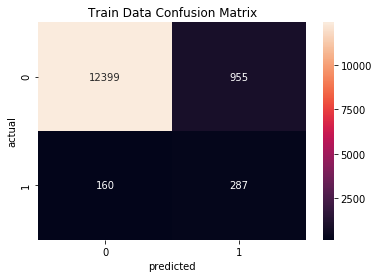

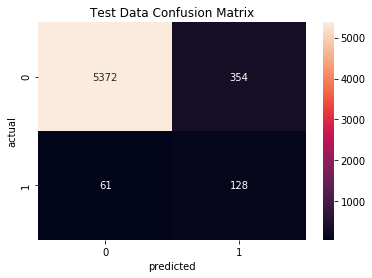

In [686]:
sns.heatmap(pd.crosstab(train_predict['actual'], train_predict['predicted']), annot=True, fmt='.0f')
plt.title('Train Data Confusion Matrix')
plt.show()
sns.heatmap(pd.crosstab(test_predict['actual'], test_predict['predicted']), annot=True, fmt='.0f')
plt.title('Test Data Confusion Matrix')
plt.show()

In [687]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_predict.actual, train_predict.predicted))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_predict.actual, test_predict.predicted))

The overall accuracy score for the Train Data is :  0.9192087529889138
The overall accuracy score for the Test Data  is :  0.9298393913778529


In [688]:
print(metrics.classification_report(train_predict.actual, train_predict.predicted))

             precision    recall  f1-score   support

          0       0.99      0.93      0.96     13354
          1       0.23      0.64      0.34       447

avg / total       0.96      0.92      0.94     13801



In [689]:
print(metrics.classification_report(test_predict.actual, test_predict.predicted))

             precision    recall  f1-score   support

          0       0.99      0.94      0.96      5726
          1       0.27      0.68      0.38       189

avg / total       0.97      0.93      0.94      5915



XGBoost Classifier 

In [207]:
# import xgboost as XGBClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [290]:
train_X = train.iloc[:,:19]
test_X = test.iloc[:,:19]

In [336]:
xgb1 = xgb.XGBClassifier(n_estimators=1000,
                    random_sate=123,
                    n_jobs=-1,
                    verbose=1,
                    max_depth=3,
                    learning_rate=0.05)
xgb1.fit(train_X,train['m13'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.05,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=1000, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_sate=123, random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbose=1, verbosity=1)

In [337]:
xgb1.predict(train_X)

C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [342]:
xgb1.feature_importances_

array([0.06638053, 0.04685772, 0.02156156, 0.04497764, 0.02181793,
       0.02373423, 0.4573933 , 0.01938963, 0.02998703, 0.07626533,
       0.02464138, 0.0432063 , 0.02328794, 0.02323483, 0.04486652,
       0.02060384, 0.        , 0.00405546, 0.00773881], dtype=float32)

In [338]:
xgb1.predict_proba(train_X)

array([[9.9775362e-01, 2.2463666e-03],
       [9.9880034e-01, 1.1996581e-03],
       [9.9672019e-01, 3.2797875e-03],
       ...,
       [9.9889612e-01, 1.1038518e-03],
       [9.9990070e-01, 9.9290395e-05],
       [9.9829113e-01, 1.7088903e-03]], dtype=float32)

In [339]:
metrics.roc_auc_score(train['m13'],pd.DataFrame(xgb1.predict_proba(train_X))[1])

0.9657107970400537

In [340]:
train_gini = 2*metrics.roc_auc_score(train['m13'], pd.DataFrame(xgb1.predict_proba(train_X))[1]) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(test['m13'], pd.DataFrame(xgb1.predict_proba(test_X))[1]) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

train_auc = metrics.roc_auc_score(train['m13'], pd.DataFrame(xgb1.predict_proba(train_X))[1])
test_auc = metrics.roc_auc_score(test['m13'], pd.DataFrame(xgb1.predict_proba(test_X))[1])

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)

The Gini Index for the model built on the Train Data is :  0.9314215940801074
The Gini Index for the model built on the Test Data is :  0.6697888403954533
The AUC for the model built on the Train Data is :  0.9657107970400537
The AUC for the model built on the Test Data is :  0.8348944201977266


In [341]:
print(metrics.classification_report(train['m13'], xgb1.predict(train_X)))

print(metrics.classification_report(test['m13'], xgb1.predict(test_X)))

C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


             precision    recall  f1-score   support

          0       1.00      1.00      1.00     80783
          1       0.90      0.47      0.62       457

avg / total       1.00      1.00      1.00     81240

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     34639
          1       0.69      0.30      0.42       179

avg / total       0.99      1.00      0.99     34818



C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


KNN

In [343]:
from sklearn.neighbors import KNeighborsClassifier

In [344]:
tuned_parameters = [{'n_neighbors': [3,5, 7, 9,11]}]

In [345]:
knn_clf = GridSearchCV(KNeighborsClassifier(),
                   tuned_parameters,
                   cv=5,
                   scoring='accuracy')

In [346]:
knn_clf.fit(train_X, train['m13'])

knn_clf.best_score_

0.9943746922698178

In [347]:
knn_clf.best_params_

{'n_neighbors': 5}

In [350]:
knn_clf = knn_clf.best_estimator_
knn_clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [351]:
knn_cm = metrics.confusion_matrix(test['m13'], knn_clf.predict( test_X ) )

Text(0.5,15,'Predicted label')

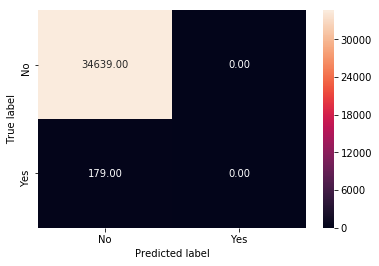

In [353]:
sns.heatmap(knn_cm, annot=True,  fmt='.2f', xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

UnderSampling

Test Data

In [701]:
new_data = pd.read_csv('C:\\Analytix\\Git\\Analytix\\Hackathon\\test_3BA6GZX\\test.csv')
new_data.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,1,Y,Browning-Hart,3.875,417000,360,01/02/12,Apr-12,75,1,...,0,0,0,0,0,0,0,0,0,0
1,2,X,OTHER,4.500,113000,360,01/02/12,Apr-12,80,2,...,0,0,0,0,0,0,0,0,0,0
2,3,Y,OTHER,4.500,72000,360,01/01/12,Mar-12,75,1,...,0,0,0,0,0,0,0,0,0,0
3,4,X,"Miller, Mcclure and Allen",4.125,123000,180,01/02/12,Apr-12,41,2,...,0,0,0,0,0,0,0,0,0,0
4,5,X,Browning-Hart,3.250,166000,180,01/02/12,Apr-12,53,2,...,0,0,0,0,0,0,0,0,0,0


In [702]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35866 entries, 0 to 35865
Data columns (total 28 columns):
loan_id                     35866 non-null int64
source                      35866 non-null object
financial_institution       35866 non-null object
interest_rate               35866 non-null float64
unpaid_principal_bal        35866 non-null int64
loan_term                   35866 non-null int64
origination_date            35866 non-null object
first_payment_date          35866 non-null object
loan_to_value               35866 non-null int64
number_of_borrowers         35866 non-null int64
debt_to_income_ratio        35866 non-null int64
borrower_credit_score       35866 non-null int64
loan_purpose                35866 non-null object
insurance_percent           35866 non-null int64
co-borrower_credit_score    35866 non-null int64
insurance_type              35866 non-null int64
m1                          35866 non-null int64
m2                          35866 non-null int64
m3

In [703]:
num_vars = [col for col in dict(new_data.dtypes) if dict(new_data.dtypes)[col] in ['float64','int64']]
cat_vars = [col for col in dict(new_data.dtypes) if dict(new_data.dtypes)[col] in ['object']]
print(num_vars)
print(cat_vars)

['loan_id', 'interest_rate', 'unpaid_principal_bal', 'loan_term', 'loan_to_value', 'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score', 'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']
['source', 'financial_institution', 'origination_date', 'first_payment_date', 'loan_purpose']


In [704]:
cat_vars = ['source',
            'financial_institution',
            'origination_date',
            'first_payment_date',
            'loan_purpose',
            'insurance_type',
            'number_of_borrowers']
num_vars = ['loan_id',
            'interest_rate',
            'unpaid_principal_bal',
            'loan_term',
            'loan_to_value',
            'debt_to_income_ratio',
            'borrower_credit_score',
            'insurance_percent',
            'co-borrower_credit_score']
ordinal_vars = ['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']

In [705]:
data_num = new_data[num_vars]
data_ord = new_data[ordinal_vars]
data_cat = new_data[cat_vars]

data_num = data_num.apply(lambda x: outlierCapping(x))

data_cat.drop(columns=['origination_date','first_payment_date'],inplace=True)
data_cat = data_cat.apply(lambda x: x.astype('category'))

data_cat_new = data_cat
for col in data_cat.columns:
    data_cat_new = create_dummies(data_cat_new,col)

new_data_d1 = pd.concat([data_num,data_cat_new,data_ord],axis=1)
new_data_d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35866 entries, 0 to 35865
Data columns (total 45 columns):
loan_id                                              35866 non-null float64
interest_rate                                        35866 non-null float64
unpaid_principal_bal                                 35866 non-null float64
loan_term                                            35866 non-null float64
loan_to_value                                        35866 non-null float64
debt_to_income_ratio                                 35866 non-null float64
borrower_credit_score                                35866 non-null float64
insurance_percent                                    35866 non-null float64
co-borrower_credit_score                             35866 non-null float64
source_Y                                             35866 non-null uint8
source_Z                                             35866 non-null uint8
financial_institution_Browning-Hart                  35866 

C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [706]:
new_data_d1.drop(columns=['borrower_credit_score'],inplace=True)
new_data_d1.drop(columns=['loan_id'],inplace=True)

In [707]:
new_data_d1.columns = [var.strip().replace('-','_') for var in new_data_d1.columns]
new_data_d1.columns = [var.strip().replace(' ','_') for var in new_data_d1.columns]
new_data_d1.columns = [var.strip().replace(',','_') for var in new_data_d1.columns]
new_data_d1.columns = [var.strip().replace('.','_') for var in new_data_d1.columns]

In [708]:
new_data_d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35866 entries, 0 to 35865
Data columns (total 43 columns):
interest_rate                                        35866 non-null float64
unpaid_principal_bal                                 35866 non-null float64
loan_term                                            35866 non-null float64
loan_to_value                                        35866 non-null float64
debt_to_income_ratio                                 35866 non-null float64
insurance_percent                                    35866 non-null float64
co_borrower_credit_score                             35866 non-null float64
source_Y                                             35866 non-null uint8
source_Z                                             35866 non-null uint8
financial_institution_Browning_Hart                  35866 non-null uint8
financial_institution_Chapman_Mcmahon                35866 non-null uint8
financial_institution_Cole__Brooks_and_Vincent       35866 non-

In [709]:
model_vars = ['co_borrower_credit_score',
             'debt_to_income_ratio',
              'financial_institution_Edwards_Hoffman',
              'interest_rate',
              'loan_purpose_B12',
              'loan_to_value',
              'm1',
              'm12',
              'm4',
              'unpaid_principal_bal'
             ]

In [710]:
final_pred = pd.DataFrame(result.predict(new_data_d1))
final_pred.columns = ['prob']
# making a DataFrame with actual and prob columns
final_pred.head()

,prob
0,0.007482
1,0.018055
2,0.039043
3,0.008511
4,0.002302


In [711]:
final_pred['predicted'] = final_pred['prob'].apply(lambda x: 1 if x > 0.040816 else 0)
# final_pred['predicted'] = final_pred['prob'].apply(lambda x: 1 if x > 0.102041 else 0)

In [712]:
sub_pred = final_pred['predicted']
sub_pred
# # sub_pred.drop(columns=['prob'],inplace=True)
# sub_pred.columns = ['m13']
# sub_pred = sub_pred.reset_index()
# sub_pred.head()

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       1
11       0
12       0
13       0
14       0
15       1
16       0
17       0
18       0
19       1
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
35836    0
35837    0
35838    0
35839    0
35840    0
35841    0
35842    0
35843    0
35844    0
35845    0
35846    0
35847    0
35848    0
35849    0
35850    0
35851    0
35852    1
35853    0
35854    0
35855    0
35856    0
35857    0
35858    1
35859    1
35860    0
35861    0
35862    0
35863    0
35864    1
35865    0
Name: predicted, Length: 35866, dtype: int64

In [713]:
sub_pred.to_csv('solution.csv')

In [204]:
sub_pred.m13.value_counts()

0    35624
1      242
Name: m13, dtype: int64

XGBOOST

In [278]:
final_columns = train.columns.difference(['insurance_type_1_0', 'm13'])
final_columns = final_columns.insert(item='insurance_type_1',loc=0)
new_data_d2 = new_data_d1[final_columns]
# new_data_d2.columns.rename({insurance_type_1: 'insurance_type_1_0'},inplace=True)
new_data_d2.rename(columns={'insurance_type_1': 'insurance_type_1_0'},inplace=True)
new_data_d2.columns = ['m4', 'm3', 'loan_to_value', 'm2', 'insurance_percent', 'loan_purpose_C86', 'm12', 'loan_purpose_B12', 'interest_rate', 'm1', 'debt_to_income_ratio', 'co_borrower_credit_score', 'unpaid_principal_bal', 'source_Y', 'financial_institution_Edwards_Hoffman', 'insurance_type_1_0', 'financial_institution_Thornton_Davis', 'financial_institution_Taylor__Hunt_and_Rodriguez', 'financial_institution_Romero__Woods_and_Johnson']
new_data_d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35866 entries, 0 to 35865
Data columns (total 19 columns):
m4                                                  35866 non-null uint8
m3                                                  35866 non-null float64
loan_to_value                                       35866 non-null float64
m2                                                  35866 non-null uint8
insurance_percent                                   35866 non-null uint8
loan_purpose_C86                                    35866 non-null uint8
m12                                                 35866 non-null uint8
loan_purpose_B12                                    35866 non-null float64
interest_rate                                       35866 non-null float64
m1                                                  35866 non-null uint8
debt_to_income_ratio                                35866 non-null uint8
co_borrower_credit_score                            35866 non-null float64
unpai

C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [279]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81240 entries, 11010 to 15725
Data columns (total 20 columns):
m4                                                  81240 non-null int64
m3                                                  81240 non-null int64
loan_to_value                                       81240 non-null float64
m2                                                  81240 non-null int64
insurance_percent                                   81240 non-null float64
loan_purpose_C86                                    81240 non-null uint8
m12                                                 81240 non-null int64
loan_purpose_B12                                    81240 non-null uint8
interest_rate                                       81240 non-null float64
m1                                                  81240 non-null int64
debt_to_income_ratio                                81240 non-null float64
co_borrower_credit_score                            81240 non-null float64
u

In [333]:
sub_pred2 = xgb1.predict(new_data_d2)
sub_pred2

C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [335]:
sub_pred_df = pd.DataFrame()
sub_pred_df['out'] = sub_pred2
sub_pred_df.to_csv('xgboost.csv')

KNN

In [354]:
sub_pred3 = knn_clf.predict(new_data_d2)
sub_pred_df = pd.DataFrame()
sub_pred_df['out'] = sub_pred3
sub_pred_df.to_csv('knn.csv')